In [1]:
!wget https://github.com/x4nth055/pythoncode-tutorials/raw/master/general/dataframe-to-html/Churn_Modelling.csv

--2022-03-19 18:19:48--  https://github.com/x4nth055/pythoncode-tutorials/raw/master/general/dataframe-to-html/Churn_Modelling.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/x4nth055/pythoncode-tutorials/master/general/dataframe-to-html/Churn_Modelling.csv [following]
--2022-03-19 18:19:48--  https://raw.githubusercontent.com/x4nth055/pythoncode-tutorials/master/general/dataframe-to-html/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674857 (659K) [text/plain]
Saving to: ‘Churn_Modelling.csv’

Churn_Modelling.csv 100%[===================>] 659.04K  --.-KB/s    in 0.05s 

## Install the necessary dependencies

In [ ]:
!pip install ipython==7.22.0
!pip install joblib==1.0.1
!pip install lightgbm==3.3.1
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit_learn==0.24.1
!pip install seaborn
!pip install shap==0.40.0
!pip install xgboost==1.5.1

     |████████████████████████████████| 785 kB 4.0 MB/s 
     |████████████████████████████████| 380 kB 43.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.22.0 which is incompatible.


     |████████████████████████████████| 303 kB 3.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
     |████████████████████████████████| 2.0 MB 3.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
     |████████████████████████████████| 11.5 MB 2.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 15.3 MB 3.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.22.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.
     |████████████████████████████████| 285 kB 2.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
     |████████████████████████████████| 564 kB 3.2 MB/s 
     |████████████████████████████████| 173.5 MB 11 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## Show me the code

In [ ]:
%matplotlib inline

In [2]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report 
import subprocess
import joblib
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
## Reading the dataset
dc = pd.read_csv("Churn_Modelling.csv")
dc.head(10) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
## Dimension of the dataset
dc.shape

(10000, 14)

### Basic EDA

In [8]:
dc.describe(exclude= ['O']) # Describe all numerical columns
dc.describe(include = ['O']) # Describe all non-numerical/categorical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
## Checking number of unique customers in the dataset
dc.shape[0], dc.CustomerId.nunique()

(10000, 10000)

In [10]:
# churn value Distribution
dc["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
dc.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [12]:
dc.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

,Geography,RowNumber,Exited
0,France,5014,0.161548
1,Germany,2509,0.324432
2,Spain,2477,0.166734


### Univariate plots of numerical variables in training set

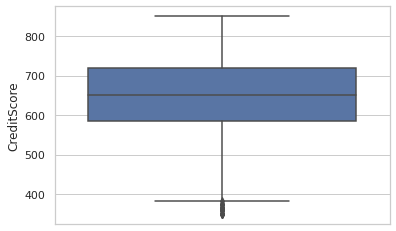

In [13]:
## CreditScore
sns.set(style="whitegrid")
sns.boxplot(y = dc['CreditScore'])

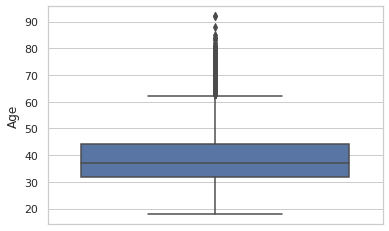

In [14]:
## Age
sns.boxplot(y = dc['Age'])

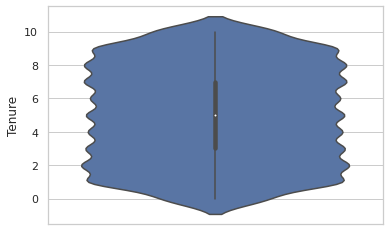

In [15]:
## Tenure
sns.violinplot(y = dc.Tenure)

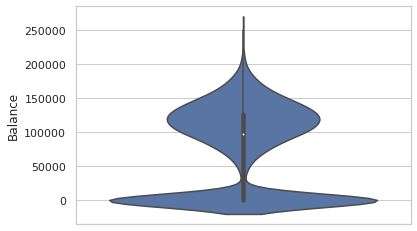

In [16]:
## Balance
sns.violinplot(y = dc['Balance'])

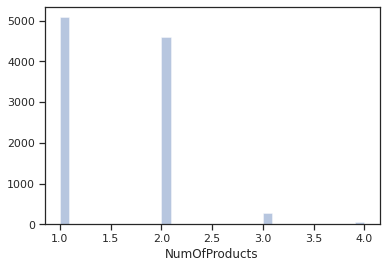

In [17]:
## NumOfProducts
sns.set(style = 'ticks')
sns.distplot(dc.NumOfProducts, hist=True, kde=False)

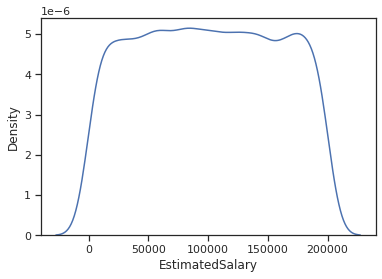

In [19]:
## EstimatedSalary
## When dealing with numerical characteristics, one of the most useful statistics to examine is the data distribution.
## we can use Kernel-Density-Estimation plot for that purpose. 
sns.kdeplot(dc.EstimatedSalary)

In [4]:
## Separating out different columns into various categories as defined above
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
# numerical columns
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# categorical columns
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [5]:
## Separating out target variable and removing the non-essential columns
y = dc[target_var].values
dc.drop(cols_to_remove, axis=1, inplace=True)

In [6]:
## Keeping aside a test/holdout set
dc_train_val, dc_test, y_train_val, y_test = train_test_split(dc, y.ravel(), test_size = 0.1, random_state = 42)

## Splitting into train and validation set
dc_train, dc_val, y_train, y_val = train_test_split(dc_train_val, y_train_val, test_size = 0.12, random_state = 42)
dc_train.shape, dc_val.shape, dc_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

In [ ]:
## No missing values!
dc_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
##  label encoding With  the sklearn method
le = LabelEncoder()
## Label encoding of Gender variable
dc_train['Gender'] = le.fit_transform(dc_train['Gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_gender_mapping

{'Female': 0, 'Male': 1}

In [8]:
## Encoding Gender feature for validation and test set
dc_val['Gender'] = dc_val.Gender.map(le_gender_mapping)
dc_test['Gender'] = dc_test.Gender.map(le_gender_mapping)

## Filling missing/NaN values created due to new categorical levels
dc_val['Gender'].fillna(-1, inplace=True)
dc_test['Gender'].fillna(-1, inplace=True)

In [9]:
dc_train.Gender.unique(), dc_val.Gender.unique(), dc_test.Gender.unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

In [10]:
## With the sklearn method(LabelEncoder())
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
enc_train = le_ohe.fit_transform(dc_train.Geography).reshape(dc_train.shape[0],1)

In [11]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
## mapping between classes
le_ohe_geography_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_geography_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [13]:
## Encoding Geography feature for validation and test set
enc_val = dc_val.Geography.map(le_ohe_geography_mapping).ravel().reshape(-1,1)
enc_test = dc_test.Geography.map(le_ohe_geography_mapping).ravel().reshape(-1,1)

## Filling missing/NaN values created due to new categorical levels
enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [14]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [15]:
### Show what happens when a new value is inputted into the OHE 
ohe.transform(np.array([[9999]]))

array([[0., 0., 0.]])

In [16]:
cols = ['country_' + str(x) for x in le_ohe_geography_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [17]:
## Adding to the respective dataframes
dc_train = pd.concat([dc_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
dc_val = pd.concat([dc_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
dc_test = pd.concat([dc_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)
print("Training set")
dc_train.head()
print("\n\nValidation set")
dc_val.head()
print("\n\nTest set")
dc_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,Germany,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,France,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,France,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,France,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,France,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Sun,757,France,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0
1,Russo,552,France,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0
2,Munro,619,France,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0
3,Perkins,633,France,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
4,Aliyeva,698,Spain,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [18]:
## Drop the Geography column
dc_train.drop(['Geography'], axis = 1, inplace=True)
dc_val.drop(['Geography'], axis = 1, inplace=True)
dc_test.drop(['Geography'], axis = 1, inplace=True)

In [19]:
dc_train.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0


In [20]:
means = dc_train.groupby(['Surname']).Exited.mean()
means.head()
means.tail()

Surname
Abazu       0.00
Abbie       0.00
Abbott      0.25
Abdullah    1.00
Abdulov     0.00
Name: Exited, dtype: float64

Surname
Zubarev     0.0
Zubareva    0.0
Zuev        0.0
Zuyev       0.0
Zuyeva      0.0
Name: Exited, dtype: float64

In [21]:
global_mean = y_train.mean()
global_mean

0.20303030303030303

In [22]:
## Creating new encoded features for surname - Target (mean) encoding
dc_train['Surname_mean_churn'] = dc_train.Surname.map(means)
dc_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

In [23]:
## Calculate frequency of each category
freqs = dc_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     1
dtype: int64

In [24]:
## Create frequency encoding - Number of instances of each category in the data
dc_train['Surname_freq'] = dc_train.Surname.map(freqs)
dc_train['Surname_freq'].fillna(0, inplace=True)

In [25]:
## Create Leave-one-out target encoding for Surname
dc_train['Surname_enc'] = ((dc_train.Surname_freq * dc_train.Surname_mean_churn) - dc_train.Exited)/(dc_train.Surname_freq - 1)
## Fill NaNs occuring due to category frequency being 1 or less
dc_train['Surname_enc'].fillna((((dc_train.shape[0] * global_mean) - dc_train.Exited) / (dc_train.shape[0] - 1)), inplace=True)
dc_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,0.203056
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


In [26]:
## Fill NaNs occuring due to category frequency being 1 or less
dc_train['Surname_enc'].fillna((((dc_train.shape[0] * global_mean) - dc_train.Exited) / (dc_train.shape[0] - 1)), inplace=True)
dc_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,4,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,2,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.200000,10,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.285714,21,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.333333,3,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,0.285714,14,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,0.200000,10,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,0.000000,1,0.203056
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,0.000000,3,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,0.000000,4,0.000000


In [27]:
## Replacing by category means and new category levels by global mean
dc_val['Surname_enc'] = dc_val.Surname.map(means)
dc_val['Surname_enc'].fillna(global_mean, inplace=True)

dc_test['Surname_enc'] = dc_test.Surname.map(means)
dc_test['Surname_enc'].fillna(global_mean, inplace=True)
## Show that using LOO Target encoding decorrelates features
dc_train[['Surname_mean_churn', 'Surname_enc', 'Exited']].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.54823,0.562677
Surname_enc,0.548230,1.00000,-0.026440
Exited,0.562677,-0.02644,1.000000


In [28]:
### Deleting the 'Surname' and other redundant column across the three datasets
dc_train.drop(['Surname_mean_churn'], axis=1, inplace=True)
dc_train.drop(['Surname_freq'], axis=1, inplace=True)
dc_train.drop(['Surname'], axis=1, inplace=True)
dc_val.drop(['Surname'], axis=1, inplace=True)
dc_test.drop(['Surname'], axis=1, inplace=True)
dc_train.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000


In [29]:
## Check linear correlation (rho) between individual features and the target variable
corr = dc_train.corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
CreditScore,1.000000,0.000354,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117,-0.009481,0.003393,0.007561,-0.000739
Gender,0.000354,1.000000,-0.024446,0.010749,0.009380,-0.026795,0.007550,0.028094,-0.011007,-0.102331,0.000823,-0.018412,0.017361,0.008002
Age,0.002099,-0.024446,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221,-0.038881,0.048764,-0.003648,-0.010844
Tenure,0.005994,0.010749,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660,0.000021,-0.003131,0.003090,-0.006753
Balance,-0.001507,0.009380,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377,-0.231770,0.405616,-0.136044,0.006925
NumOfProducts,0.014110,-0.026795,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200,0.002991,-0.015926,0.012388,-0.002020
HasCrCard,-0.011868,0.007550,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659,0.005881,0.008197,-0.014934,-0.000551
IsActiveMember,0.035057,0.028094,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477,0.002126,-0.020570,0.018003,0.004902
EstimatedSalary,0.000358,-0.011007,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881,-0.004512,0.010583,-0.005320,-0.009899
Exited,-0.028117,-0.102331,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000,-0.106006,0.173492,-0.050264,-0.026440


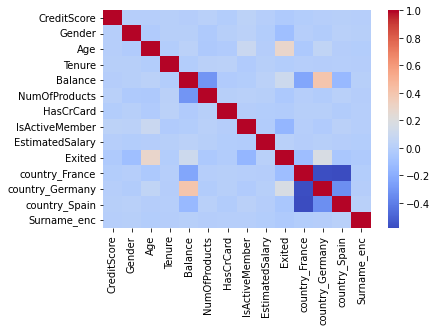

In [30]:
sns.heatmap(corr, cmap = 'coolwarm')

<AxesSubplot:xlabel='Exited', ylabel='Age'>

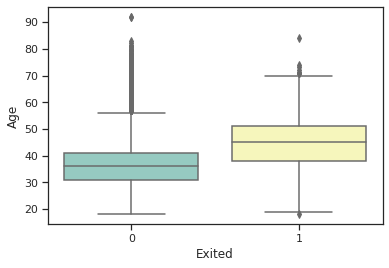

In [ ]:
sns.boxplot(x = "Exited", y = "Age", data = dc_train, palette="Set3")

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

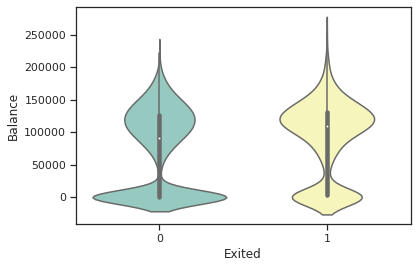

In [ ]:
sns.violinplot(x = "Exited", y = "Balance", data = dc_train, palette="Set3")

In [31]:
# Check association of categorical features with target variable
cat_vars_bv = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for col in cat_vars_bv:
    dc_train.groupby([col]).Exited.mean()
    print()

Gender
0    0.248191
1    0.165511
Name: Exited, dtype: float64

IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64

country_Germany
0.0    0.163091
1.0    0.324974
Name: Exited, dtype: float64

country_France
0.0    0.245877
1.0    0.160593
Name: Exited, dtype: float64

In [ ]:
## Computed mean on churned or non chuned custmers group by number of product on training data
col = 'NumOfProducts'
dc_train.groupby([col]).Exited.mean()
## unique "NumOfProducts" on training data
dc_train[col].value_counts()

NumOfProducts
1    0.273428
2    0.076881
3    0.825112
4    1.000000
Name: Exited, dtype: float64

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

In [ ]:
## List of columns
dc_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc'],
      dtype='object')

Creating some new features based on simple interactions between the existing features.
```
* bal_per_product = Balance/NumOfProducts
* bal_by_est_salary = Balance/EstimatedSalary
* tenure_age_ratio = Tenure/Age
* age_surname_mean_churn = Age * Surname_enc
```

In [ ]:
eps = 1e-6

dc_train['bal_per_product'] = dc_train.Balance/(dc_train.NumOfProducts + eps)
dc_train['bal_by_est_salary'] = dc_train.Balance/(dc_train.EstimatedSalary + eps)
dc_train['tenure_age_ratio'] = dc_train.Tenure/(dc_train.Age + eps)
dc_train['age_surname_mean_churn'] = np.sqrt(dc_train.Age) * dc_train.Surname_enc

In [ ]:
dc_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,58932.395534,4.267519,0.027778,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,125167.614832,0.628653,0.185185,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.200000,1.490712
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000,0.000000,0.000000,0.166667,1.643168
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.181818,2.345208


In [ ]:
new_cols = ['bal_per_product','bal_by_est_salary','tenure_age_ratio','age_surname_mean_churn']

In [ ]:
## Ensuring that the new column doesn't have any missing values
dc_train[new_cols].isnull().sum()

bal_per_product           0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

<AxesSubplot:>

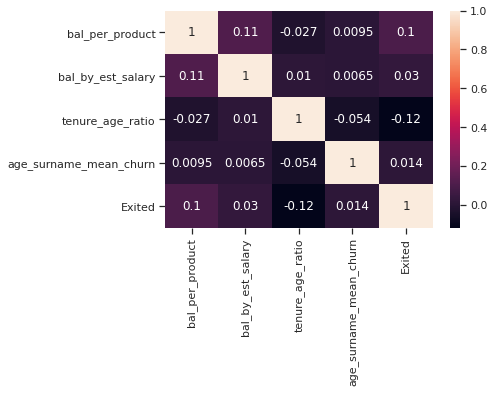

In [ ]:
## Linear association of new columns with target variables to judge importance
sns.heatmap(dc_train[new_cols + ['Exited']].corr(), annot=True)

Out of the new features, ones with slight linear association/correlation are : `bal_per_product` and `tenure_age_ratio`  


In [ ]:
## Creating new interaction feature terms for validation set
eps = 1e-6

dc_val['bal_per_product'] = dc_val.Balance/(dc_val.NumOfProducts + eps)
dc_val['bal_by_est_salary'] = dc_val.Balance/(dc_val.EstimatedSalary + eps)
dc_val['tenure_age_ratio'] = dc_val.Tenure/(dc_val.Age + eps)
dc_val['age_surname_mean_churn'] = np.sqrt(dc_val.Age) * dc_val.Surname_enc

In [ ]:
## Creating new interaction feature terms for test set
eps = 1e-6

dc_test['bal_per_product'] = dc_test.Balance/(dc_test.NumOfProducts + eps)
dc_test['bal_by_est_salary'] = dc_test.Balance/(dc_test.EstimatedSalary + eps)
dc_test['tenure_age_ratio'] = dc_test.Tenure/(dc_test.Age + eps)
dc_test['age_surname_mean_churn'] = np.sqrt(dc_test.Age) * dc_test.Surname_enc

### Feature scaling and normalization

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

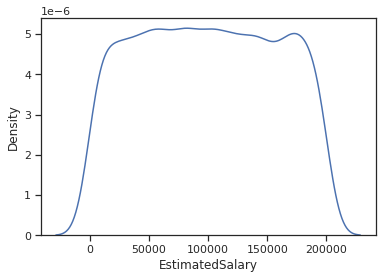

In [ ]:
### Demo-ing feature transformations
sns.distplot(dc_train.EstimatedSalary, hist=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

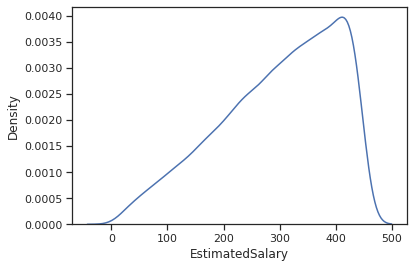

In [ ]:
sns.distplot(np.sqrt(dc_train.EstimatedSalary), hist=False)
#sns.distplot(np.log10(1+df_train.EstimatedSalary), hist=False)

#### StandardScaler

In [ ]:
# initialize the standard scaler
sc = StandardScaler()

In [ ]:
dc_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

Scaling only continuous variables

In [ ]:
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc', 'bal_per_product'
             , 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']
## Scaling only continuous columns
cols_to_scale = cont_vars
sc_X_train = sc.fit_transform(dc_train[cols_to_scale])
## Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_train.shape
sc_X_train.head()

(7920, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [ ]:
## Mapping learnt on the continuous features
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}
sc_map

{'mean': array([6.50542424e+02, 3.88912879e+01, 5.01376263e+00, 7.60258447e+04,
        1.53156566e+00, 9.96616540e+04, 2.04321788e-01, 6.24727199e+04,
        2.64665647e+00, 1.38117689e-01, 1.26136416e+00]),
 'std': array([9.64231806e+01, 1.05374237e+01, 2.88940724e+00, 6.23738902e+04,
        5.82587032e-01, 5.74167173e+04, 1.89325378e-01, 5.67456646e+04,
        1.69816787e+01, 8.95590667e-02, 1.18715858e+00])}

In [ ]:
## Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(dc_val[cols_to_scale])
sc_X_test = sc.transform(dc_test[cols_to_scale])
## Converting val and test arrays to dataframes for re-usability
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)

In [ ]:
cont_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [ ]:
cat_vars

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [ ]:
## Creating feature-set and target for RFE model
y = dc_train['Exited'].values
#X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1)
X = dc_train[cat_vars + cont_vars]
X.columns = cat_vars + cont_vars
X.columns

Index(['Gender', 'HasCrCard', 'IsActiveMember', 'country_France',
       'country_Germany', 'country_Spain', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [ ]:
# for logistics regression
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10) 
rfe = rfe.fit(X.values, y) 
#  mask of selected features
print(rfe.support_)
## The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature 
print(rfe.ranking_)

[ True  True  True  True  True  True False  True False False  True False
  True False False  True False]
[1 1 1 1 1 1 4 1 3 6 1 8 1 7 5 1 2]


In [ ]:
# for decision trees
rfe_dt = RFE(estimator=DecisionTreeClassifier(max_depth = 4, criterion = 'entropy'), n_features_to_select=10) 
rfe_dt = rfe_dt.fit(X.values, y)  
#  mask of selected features
print(rfe_dt.support_)
## The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature 
print(rfe_dt.ranking_)

[False False  True False  True False False  True False  True  True  True
 False  True  True  True  True]
[8 7 1 6 1 5 4 1 3 1 1 1 2 1 1 1 1]


In [ ]:
## Logistic Regression (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio']

In [ ]:
## Decision Tree (Non-linear model)
mask = rfe_dt.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [ ]:
## Importing relevant metrics
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]
## Using categorical features and scaled numerical features
X_train = np.concatenate((dc_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((dc_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((dc_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

# print the shape
X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

In [ ]:
# Obtaining class weights based on the class samples imbalance ratio
_, num_samples = np.unique(y_train, return_counts = True)
weights = np.max(num_samples)/num_samples
## Define weight dictionnary
weights_dict = dict()
class_labels = [0,1]
## Weights associated with classes
for a,b in zip(class_labels,weights):
    weights_dict[a] = b

weights_dict

{0: 1.0, 1: 3.925373134328358}

In [ ]:
## Defining model
lr = LogisticRegression(C = 1.0, penalty = 'l2', class_weight = weights_dict, n_jobs = -1)
## Fitting model
lr.fit(X_train, y_train)
## Fitted model parameters
selected_cat_vars + selected_cont_vars

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio']

In [ ]:
## coef_ is the coeficient
lr.coef_

array([[-0.5190172 , -0.06938782, -0.90843476, -0.33748839,  0.58664742,
        -0.24918718,  0.80999582, -0.05061525, -0.0659637 , -0.05143544]])

In [ ]:
## intercept_
lr.intercept_

array([0.60235927])

In [ ]:
print(f'Confusion Matrix: \n{confusion_matrix(y_train, lr.predict(X_train))}')
print(f'Area Under Curve: {roc_auc_score(y_train, lr.predict(X_train))}')
print(f'Recall score: {recall_score(y_train,lr.predict(X_train))}')
print(f'Classification report: \n{classification_report(y_train,lr.predict(X_train))}')

Confusion Matrix: 
[[4515 1797]
 [ 485 1123]]
Area Under Curve: 0.70684363354331
Recall score: 0.6983830845771144
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6312
           1       0.38      0.70      0.50      1608

    accuracy                           0.71      7920
   macro avg       0.64      0.71      0.65      7920
weighted avg       0.80      0.71      0.74      7920



In [ ]:
print(f'Confusion Matrix: \n{confusion_matrix(y_val, lr.predict(X_val))}')
print(f'Area Under Curve: {roc_auc_score(y_val, lr.predict(X_val))}')
print(f'Recall score: {recall_score(y_val,lr.predict(X_val))}')
print(f'Classification report: \n{classification_report(y_val,lr.predict(X_val))}')

Confusion Matrix: 
[[590 252]
 [ 71 167]]
Area Under Curve: 0.7011966306712709
Recall score: 0.7016806722689075
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       842
           1       0.40      0.70      0.51       238

    accuracy                           0.70      1080
   macro avg       0.65      0.70      0.65      1080
weighted avg       0.78      0.70      0.72      1080



In [ ]:
## Define Support Vector Classifier
svm = SVC(C = 1.0, kernel = "linear", class_weight = weights_dict)
## Fitted model parameters
svm.fit(X_train, y_train)
selected_cat_vars + selected_cont_vars

SVC(class_weight={0: 1.0, 1: 3.925373134328358}, kernel='linear')

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio']

In [ ]:
## Define coeficient
svm.coef_

array([[-0.47038465, -0.05340445, -0.72996153, -0.30836204,  0.55362911,
        -0.24526708,  0.87476177, -0.04764615, -0.05580166, -0.03797282]])

In [ ]:
svm.intercept_

array([0.45490808])

In [ ]:
## Training metrics
print(f'Confusion Matrix: \n{confusion_matrix(y_train, lr.predict(X_train))}')
print(f'Area Under Curve: {roc_auc_score(y_train, lr.predict(X_train))}')
print(f'Recall score: {recall_score(y_train,lr.predict(X_train))}')
print(f'Classification report: \n{classification_report(y_train,lr.predict(X_train))}')

Confusion Matrix: 
[[4515 1797]
 [ 485 1123]]
Area Under Curve: 0.70684363354331
Recall score: 0.6983830845771144
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6312
           1       0.38      0.70      0.50      1608

    accuracy                           0.71      7920
   macro avg       0.64      0.71      0.65      7920
weighted avg       0.80      0.71      0.74      7920



In [ ]:
## Validation metrics
print(f'Confusion Matrix: {confusion_matrix(y_val, lr.predict(X_val))}')
print(f'Area Under Curve: {roc_auc_score(y_val, lr.predict(X_val))}')
print(f'Recall score: {recall_score(y_val,lr.predict(X_val))}')
print(f'Classification report: \n{classification_report(y_val,lr.predict(X_val))}')

Confusion Matrix: [[590 252]
 [ 71 167]]
Area Under Curve: 0.7011966306712709
Recall score: 0.7016806722689075
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       842
           1       0.40      0.70      0.51       238

    accuracy                           0.70      1080
   macro avg       0.65      0.70      0.65      1080
weighted avg       0.78      0.70      0.72      1080



In [ ]:
pca = PCA(n_components=2)
## Transforming the dataset using PCA
X_pca = pca.fit_transform(X_train)
y = y_train
X_pca.shape, y.shape

((7920, 2), (7920,))

In [ ]:
## Checking the variance explained by the reduced features
pca.explained_variance_ratio_

array([0.2602733 , 0.18789887])

LogisticRegression(class_weight={0: 1.0, 1: 3.925373134328358}, n_jobs=-1)

SVC(class_weight={0: 1.0, 1: 3.925373134328358}, kernel='linear')

<AxesSubplot:>

Text(0.5, 1.0, 'Linear models - LogReg and SVM')

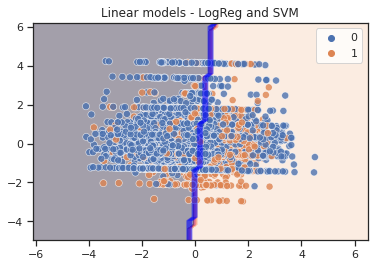

In [ ]:
# min and max values 
xmin, xmax = X_pca[:, 0].min() - 2, X_pca[:, 0].max() + 2
ymin, ymax = X_pca[:, 1].min() - 2, X_pca[:, 1].max() + 2
# Creating a mesh region where the boundary will be plotted
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.2),
                     np.arange(ymin, ymax, 0.2))
## Fitting LR model on 2 features
lr.fit(X_pca, y)
## Fitting SVM model on 2 features
svm.fit(X_pca, y)
## Plotting decision boundary for LR
z1 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
z1 = z1.reshape(xx.shape)

## Plotting decision boundary for SVM
z2 = svm.predict(np.c_[xx.ravel(), yy.ravel()])
z2 = z2.reshape(xx.shape)

# Displaying the result
plt.contourf(xx, yy, z1, alpha=0.4) # LR
plt.contour(xx, yy, z2, alpha=0.4, colors = 'blue') # SVM
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = y_train, s = 50, alpha = 0.8)
plt.title('Linear models - LogReg and SVM')

In [ ]:
## Features selected from the RFE process
selected_feats_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [ ]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = dc_train[selected_feats_dt].values
X_val = dc_val[selected_feats_dt].values
X_train.shape, y_train.shape
X_val.shape, y_val.shape
## Decision tree classiier model
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)
## Fit the model
clf.fit(X_train, y_train)
## Checking the importance of different features of the model
pd.DataFrame({'features': selected_feats,
              'importance': clf.feature_importances_
             }).sort_values(by = 'importance', ascending=False)

((7920, 10), (7920,))

((1080, 10), (1080,))

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=4, min_samples_leaf=15,
                       min_samples_split=25)

,features,importance
2,IsActiveMember,0.476841
4,country_Germany,0.351863
0,Gender,0.096402
6,Age,0.032268
1,HasCrCard,0.028361
7,NumOfProducts,0.010400
5,country_Spain,0.003865
3,country_France,0.000000
8,Surname_enc,0.000000
9,tenure_age_ratio,0.000000


In [ ]:
print(f'Confusion Matrix: \n{confusion_matrix(y_train, clf.predict(X_train))}')
print(f'Area Under Curve: {roc_auc_score(y_train, clf.predict(X_train))}')
print(f'Recall score: {recall_score(y_train,clf.predict(X_train))}')
print(f'Classification report: \n{classification_report(y_train,clf.predict(X_train))}')

Confusion Matrix: 
[[4835 1477]
 [ 423 1185]]
Area Under Curve: 0.7514707829672929
Recall score: 0.7369402985074627
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6312
           1       0.45      0.74      0.56      1608

    accuracy                           0.76      7920
   macro avg       0.68      0.75      0.70      7920
weighted avg       0.82      0.76      0.78      7920



In [ ]:
## Validation metrics
print(f'Confusion Matrix: {confusion_matrix(y_val, clf.predict(X_val))}')
print(f'Area Under Curve: {roc_auc_score(y_val, clf.predict(X_val))}')
print(f'Recall score: {recall_score(y_val,clf.predict(X_val))}')
print(f'Classification report: \n{classification_report(y_val,clf.predict(X_val))}')

Confusion Matrix: [[633 209]
 [ 61 177]]
Area Under Curve: 0.7477394758378411
Recall score: 0.7436974789915967
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



array([0.65049371, 0.31643934])

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=4, min_samples_leaf=15,
                       min_samples_split=25)

<AxesSubplot:>

Text(0.5, 1.0, 'Decision Tree')

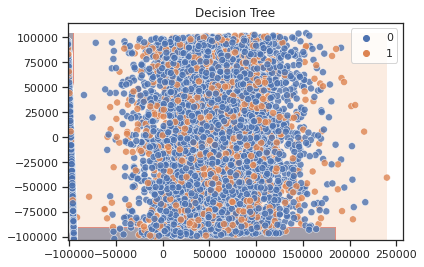

In [ ]:
pca = PCA(n_components=2)
## Transforming the dataset using PCA
X_pca = pca.fit_transform(X_train)
y = y_train
## Checking the variance explained by the reduced features
pca.explained_variance_ratio_
## Find the lowest and maximum values for each feature and extend the grid one step beyond that to 
## ensure that the whole feature space is covered. 
xmin, xmax = X_pca[:, 0].min() - 2, X_pca[:, 0].max() + 2
ymin, ymax = X_pca[:, 1].min() - 2, X_pca[:, 1].max() + 2
# Creating a mesh region where the boundary will be plotted
xx, yy = np.meshgrid(np.arange(xmin, xmax, 100),
                     np.arange(ymin, ymax, 100))
## Fitting tree model on 2 features
clf.fit(X_pca, y)
## Plotting decision boundary for Decision Tree (DT)
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Displaying the result
plt.contourf(xx, yy, z, alpha=0.4) # DT
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue = y_train, s = 50, alpha = 0.8)
plt.title('Decision Tree')

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.925373134328358},
                       criterion='entropy', max_depth=3, min_samples_leaf=15,
                       min_samples_split=25)

CompletedProcess(args=['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], returncode=0)

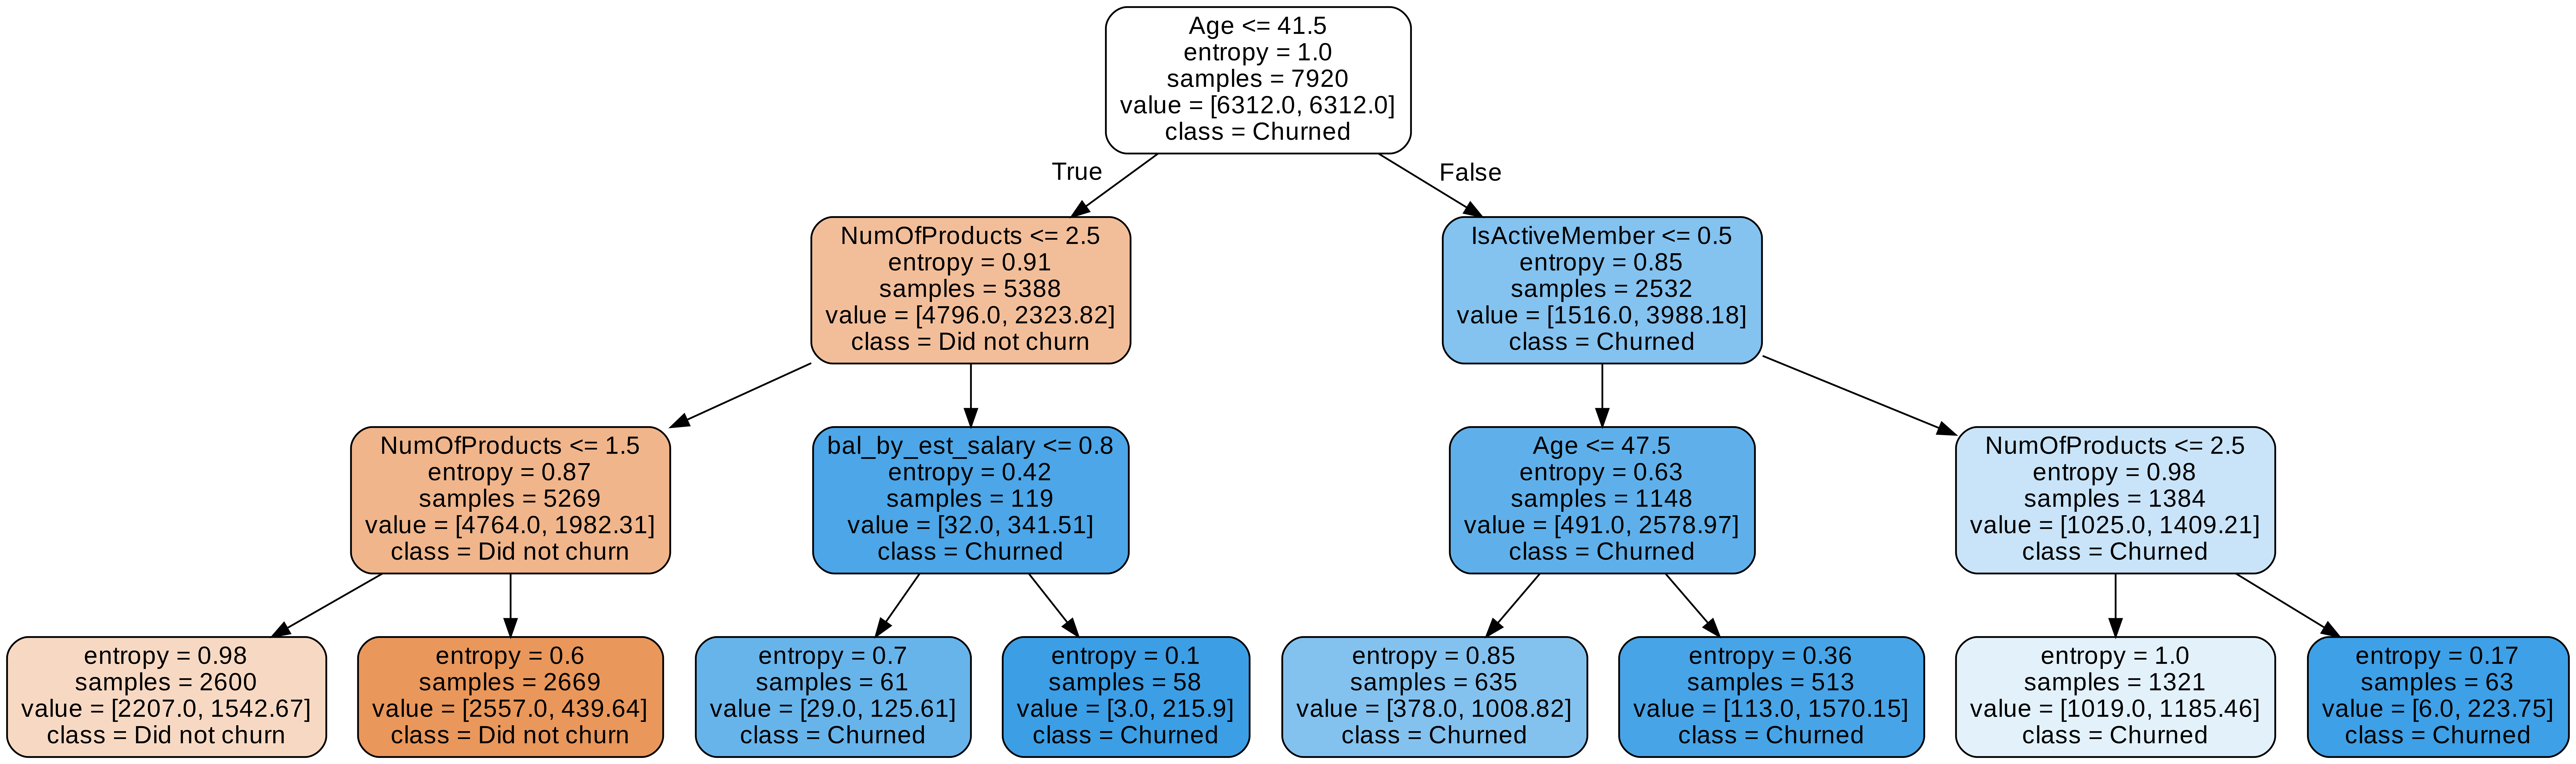

In [ ]:
## Decision tree Classifier
clf = DecisionTreeClassifier(criterion= 'entropy', class_weight=weights_dict, 
                            max_depth=3, max_features=None,
                            min_samples_split=25, min_samples_leaf=15)
## We fit the model
clf.fit(X_train, y_train)
## Export now as a dot file
dot_data = export_graphviz(clf, out_file='tree.dot',
                          feature_names=selected_feats_dt,
                          class_names=['Did not churn', 'Churned'],
                          rounded=True, proportion=False,
                          precision=2, filled=True)
## Convert to png using system command (requires Graphviz)
subprocess.run(['dot', '-Tpng','tree.dot', '-o', 'tree.png', '-Gdpi=600'])
## Display the rule-set of a single tree
from IPython.display import Image
Image(filename = 'tree.png')

### Spot-checking various ML algorithms

We will follow the following steps:

- Data preparation and model run through Pipelines

- Define a List of all models to compare/spot-check

- Model evaluation through k-fold Cross validation framework

#### Data preparation automatisation and model run through Pipelines
We create a sklearn transformer class namely `CategoricalEncoder` to perform LabelEncoding, OneHotEncoding, TargetEncoding. We draw our inspiration from this [site](https://brendanhasz.github.io/2019/03/04/target-encoding.html)

In [ ]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """ 
    Encodes categorical columns using LabelEncoding, OneHotEncoding and TargetEncoding.
    LabelEncoding is used for binary categorical columns
    OneHotEncoding is used for columns with <= 10 distinct values
    TargetEncoding is used for columns with higher cardinality (>10 distinct values)
    
    """

    def __init__(self, cols = None, lcols = None, ohecols = None, tcols = None, reduce_df = False):
        """
        
        Parameters
        ----------
        cols : list of str
            Columns to encode.  Default is to one-hot/target/label encode all categorical columns in the DataFrame.
        reduce_df : bool
            Whether to use reduced degrees of freedom for encoding
            (that is, add N-1 one-hot columns for a column with N 
            categories). E.g. for a column with categories A, B, 
            and C: When reduce_df is True, A=[1, 0], B=[0, 1],
            and C=[0, 0].  When reduce_df is False, A=[1, 0, 0], 
            B=[0, 1, 0], and C=[0, 0, 1]
            Default = False
        
        """
        
        if isinstance(cols,str):
            self.cols = [cols]
        else :
            self.cols = cols
        
        if isinstance(lcols,str):
            self.lcols = [lcols]
        else :
            self.lcols = lcols
        
        if isinstance(ohecols,str):
            self.ohecols = [ohecols]
        else :
            self.ohecols = ohecols
        
        if isinstance(tcols,str):
            self.tcols = [tcols]
        else :
            self.tcols = tcols
        
        self.reduce_df = reduce_df
    
    
    def fit(self, X, y):
        """Fit label/one-hot/target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [c for c in X if str(X[c].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')
        
        # Separating out lcols, ohecols and tcols
        if self.lcols is None:
            self.lcols = [c for c in self.cols if X[c].nunique() <= 2]
        
        if self.ohecols is None:
            self.ohecols = [c for c in self.cols if ((X[c].nunique() > 2) & (X[c].nunique() <= 10))]
        
        if self.tcols is None:
            self.tcols = [c for c in self.cols if X[c].nunique() > 10]
        
        
        ## Create Label Encoding mapping
        self.lmaps = dict()
        for col in self.lcols:
            self.lmaps[col] = dict(zip(X[col].values, X[col].astype('category').cat.codes.values))
        
        
        ## Create OneHot Encoding mapping
        self.ohemaps = dict() #dict to store map for each column
        for col in self.ohecols:
            self.ohemaps[col] = []
            uniques = X[col].unique()
            for unique in uniques:
                self.ohemaps[col].append(unique)
            if self.reduce_df:
                del self.ohemaps[col][-1]
        
        
        ## Create Target Encoding mapping
        self.global_target_mean = y.mean().round(2)
        self.sum_count = dict()
        for col in self.tcols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col]==unique
                self.sum_count[col][unique] = (y[ix].sum(),ix.sum())
        
        
        ## Return the fit object
        return self
    
    
    def transform(self, X, y=None):
        """Perform label/one-hot/target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to label encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        Xo = X.copy()
        ## Perform label encoding transformation
        for col, lmap in self.lmaps.items():
            
            # Map the column
            Xo[col] = Xo[col].map(lmap)
            Xo[col].fillna(-1, inplace=True) ## Filling new values with -1
        
        
        ## Perform one-hot encoding transformation
        for col, vals in self.ohemaps.items():
            for val in vals:
                new_col = col+'_'+str(val)
                Xo[new_col] = (Xo[col]==val).astype('uint8')
            del Xo[col]
        
        
        ## Perform LOO target encoding transformation
        # Use normal target encoding if this is test data
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col]==cat] = (sum_count[0]/sum_count[1]).round(2)
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean

        # LOO target encode each column
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col]==cat
                    if sum_count[1] > 1:
                        vals[ix] = ((sum_count[0]-y[ix].reshape(-1,))/(sum_count[1]-1)).round(2)
                    else :
                        vals[ix] = ((y.sum() - y[ix])/(X.shape[0] - 1)).round(2) # Catering to the case where a particular 
                                                                                 # category level occurs only once in the dataset
                
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean
        
        
        ## Return encoded DataFrame
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """Fit and transform the data via label/one-hot/target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        return self.fit(X, y).transform(X, y)
    


`AddFeatures` class below will allow us to add new, engineered features using original categorical and numerical features of the DataFrame.

In [ ]:
class AddFeatures(BaseEstimator):
    """
    Add new, engineered features using original categorical and numerical features of the DataFrame
    """
    
    def __init__(self, eps = 1e-6):
        """
        Parameters
        ----------
        eps : A small value to avoid divide by zero error. Default value is 0.000001
        """
        
        self.eps = eps
    
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        Xo = X.copy()
        ## Add 4 new columns - bal_per_product, bal_by_est_salary, tenure_age_ratio, age_surname_mean_churn
        Xo['bal_per_product'] = Xo.Balance/(Xo.NumOfProducts + self.eps)
        Xo['bal_by_est_salary'] = Xo.Balance/(Xo.EstimatedSalary + self.eps)
        Xo['tenure_age_ratio'] = Xo.Tenure/(Xo.Age + self.eps)
        Xo['age_surname_enc'] = np.sqrt(Xo.Age) * Xo.Surname_enc
        
        ## Returning the updated dataframe
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        return self.fit(X,y).transform(X)
    
    

 A custom standard scaler class below can apply scaling on selected columns

In [ ]:
class CustomScaler(BaseEstimator, TransformerMixin):
    """
    A custom standard scaler class with the ability to apply scaling on selected columns
    """
    
    def __init__(self, scale_cols = None):
        """
        Parameters
        ----------
        scale_cols : list of str
            Columns on which to perform scaling and normalization. Default is to scale all numerical columns
        
        """
        self.scale_cols = scale_cols
    
    
    def fit(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        
        # Scaling all non-categorical columns if user doesn't provide the list of columns to scale
        if self.scale_cols is None:
            self.scale_cols = [c for c in X if ((str(X[c].dtype).find('float') != -1) or (str(X[c].dtype).find('int') != -1))]
        
     
        ## Create mapping corresponding to scaling and normalization
        self.maps = dict()
        for col in self.scale_cols:
            self.maps[col] = dict()
            self.maps[col]['mean'] = np.mean(X[col].values).round(2)
            self.maps[col]['std_dev'] = np.std(X[col].values).round(2)
        
        # Return fit object
        return self
    
    
    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        Xo = X.copy()
        
        ## Map transformation to respective columns
        for col in self.scale_cols:
            Xo[col] = (Xo[col] - self.maps[col]['mean']) / self.maps[col]['std_dev']
        
        
        # Return scaled and normalized DataFrame
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        # Fit and return transformed dataframe
        return self.fit(X).transform(X)
    
    

#### Pipeline in action for a single model-Decision tree model

In [ ]:
weights_dict = {0 : 1.0, 1 : 3.92}
X = dc_train.drop(columns = ['Exited'], axis = 1)
X_val = dc_val.drop(columns = ['Exited'], axis = 1)

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('standard_scaling', CustomScaler(cols_to_scale)),
                          ('classifier', clf)
                         ])
# Fit pipeline with training data
model.fit(X,y_train)
# Predict target values on val data
val_preds = model.predict(X_val)
## Validation metrics
print(f'Confusion Matrix: {confusion_matrix(y_val,val_preds)}')
print(f'Area Under Curve: {roc_auc_score(y_val,val_preds)}')
print(f'Recall score: {recall_score(y_val,val_preds)}')
print(f'Classification report: \n{classification_report(y_val,val_preds)}')

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('standard_scaling',
                 CustomScaler(scale_cols=['CreditScore', 'Age', 'Balance',
                                          'EstimatedSalary', 'bal_per_product',
                                          'bal_by_est_salary',
                                          'tenure_age_ratio',
                                          'age_surname_enc'])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92},
                                        criterion='entropy', max_depth=4,
                                        min_samples_leaf=15,
                                        min_samples_split=25))])

Confusion Matrix: [[633 209]
 [ 61 177]]
Area Under Curve: 0.7477394758378411
Recall score: 0.7436974789915967
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



### Define model Zoo and k-fold Cross Validation

List of models : 
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
- [LGBMClassifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)
- [XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
## Preparing data and a few common model parameters
X = dc_train.drop(columns = ['Exited'], axis = 1)
y = y_train.ravel()

weights_dict = {0 : 1.0, 1 : 3.93}
_, num_samples = np.unique(y_train, return_counts = True)
weight = (num_samples[0]/num_samples[1]).round(2)
weight

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

3.93

In [ ]:
## Preparing a list of models to try out in the spot-checking process
def model_zoo(models = dict()):
    # Tree models
    for n_trees in [21, 1001]:
        models['rf_' + str(n_trees)] = RandomForestClassifier(n_estimators = n_trees, n_jobs = -1, criterion = 'entropy'
                                                              , class_weight = weights_dict, max_depth = 6, max_features = 0.6
                                                              , min_samples_split = 30, min_samples_leaf = 20)
        
        models['lgb_' + str(n_trees)] = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1
                                                       , n_estimators=n_trees, class_weight=weights_dict, min_child_samples=20
                                                       , colsample_bytree=0.6, reg_alpha=0.3, reg_lambda=1.0, n_jobs=- 1
                                                       , importance_type = 'gain')
        
        models['xgb_' + str(n_trees)] = XGBClassifier(objective='binary:logistic', n_estimators = n_trees, max_depth = 6
                                                      , learning_rate = 0.03, n_jobs = -1, colsample_bytree = 0.6
                                                      , reg_alpha = 0.3, reg_lambda = 0.1, scale_pos_weight = weight)
        
        models['et_' + str(n_trees)] = ExtraTreesClassifier(n_estimators=n_trees, criterion = 'entropy', max_depth = 6
                                                            , max_features = 0.6, n_jobs = -1, class_weight = weights_dict
                                                            , min_samples_split = 30, min_samples_leaf = 20)
    
    # kNN models
    for n in [3,5,11]:
        models['knn_' + str(n)] = KNeighborsClassifier(n_neighbors=n)
    
    # Naive-Bayes models
    models['gauss_nb'] = GaussianNB()
    models['multi_nb'] = MultinomialNB()
    models['compl_nb'] = ComplementNB()
    models['bern_nb'] = BernoulliNB()
    
    return models

The below function implements data preparation automation and model run through pipelines

In [ ]:
## Automation of data preparation and model run through pipelines
def make_pipeline(model):
    '''
    Creates pipeline for the model passed as the argument. Uses standard scaling only in case of kNN models. 
    Ignores scaling step for tree/Naive Bayes models
    '''
    
    if (str(model).find('KNeighborsClassifier') != -1):
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('standard_scaling', CustomScaler(cols_to_scale)),
                              ('classifier', model)
                             ])
    else :
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('classifier', model)
                             ])
    
    
    return pipe


 The below function will evaluate 15 models using K-Fold cross-validation

In [ ]:
## Run/Evaluate all 15 models using KFold cross-validation (5 folds)
def evaluate_models(X, y, models, folds = 5, metric = 'recall'):
    results = dict()
    for name, model in models.items():
        # Evaluate model through automated pipelines
        pipeline = make_pipeline(model)
        scores = cross_val_score(pipeline, X, y, cv = folds, scoring = metric, n_jobs = -1)
        
        # Store results of the evaluated model
        results[name] = scores
        mu, sigma = np.mean(scores), np.std(scores)
        # Printing individual model results
        print('Model {}: mean = {}, std_dev = {}'.format(name, mu, sigma))
    return results 

In [ ]:
## Spot-checking in action
models = model_zoo()
print('Recall metric')
results = evaluate_models(X, y , models, metric = 'recall')
print('F1-score metric')
results = evaluate_models(X, y , models, metric = 'f1')

Recall metric
Model rf_21: mean = 0.7524835045761499, std_dev = 0.02071946753429629
Model lgb_21: mean = 0.7866856291480427, std_dev = 0.015745566437193475
Model xgb_21: mean = 0.7506085408564075, std_dev = 0.01096611280139578
Model et_21: mean = 0.7412782260405177, std_dev = 0.011199108629320383
Model rf_1001: mean = 0.7512199841334339, std_dev = 0.027531904052695406
Model lgb_1001: mean = 0.6884232116251622, std_dev = 0.014573973874519829
Model xgb_1001: mean = 0.6753719935759757, std_dev = 0.01756702999772903
Model et_1001: mean = 0.737565062595538, std_dev = 0.00626496423068387
Model knn_3: mean = 0.32214933921557243, std_dev = 0.021051639994704833
Model knn_5: mean = 0.2879356049612043, std_dev = 0.006396680440459953
Model knn_11: mean = 0.23568622898163735, std_dev = 0.023099705052575383
Model gauss_nb: mean = 0.0360906329211896, std_dev = 0.0151162576177723
Model multi_nb: mean = 0.5404191095373541, std_dev = 0.022285871235774777
Model compl_nb: mean = 0.5404191095373541, std_de

Based on the relevant metric, a suitable model can be chosen for further hyperparameter tuning. LightGBM is chosen for further hyperparameter tuning because it has the best performance on recall metric and it came close second when comparing using F1-scores

### Hyperparameter tuning

 We will perform [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

- Randomized Search is more suitable for large datasets, with many parameter settings.
- Grid Search results in a more precise hyperparameter tuning, thus resulting in better model performance. Intelligent tuning mechanism can also help reduce the time taken in GridSearch by a large factor.
- We Will optimize on the F1 metric.


In [ ]:
## Preparing data and a few common model parameters
# Unscaled features will be used since it's a tree model

X_train = dc_train.drop(columns = ['Exited'], axis = 1)
X_val = dc_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 17), (7920,))

((1080, 17), (1080,))

In [ ]:
lgb = LGBMClassifier(boosting_type = 'dart', min_child_samples = 20, n_jobs = - 1, importance_type = 'gain', num_leaves = 31)
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb)
                         ])

#### Randomized Search

In [ ]:
## Exhaustive list of parameters
parameters = {'classifier__n_estimators':[10, 21, 51, 100, 201, 350, 501]
             ,'classifier__max_depth': [3, 4, 6, 9]
             ,'classifier__num_leaves':[7, 15, 31] 
             ,'classifier__learning_rate': [0.03, 0.05, 0.1, 0.5, 1]
             ,'classifier__colsample_bytree': [0.3, 0.6, 0.8]
             ,'classifier__reg_alpha': [0, 0.3, 1, 5]
             ,'classifier__reg_lambda': [0.1, 0.5, 1, 5, 10]
             ,'classifier__class_weight': [{0:1,1:1.0}, {0:1,1:1.96}, {0:1,1:3.0}, {0:1,1:3.93}]
             }
             ## Perform randomized Search
search = RandomizedSearchCV(model, parameters, n_iter = 20, cv = 5, scoring = 'f1')
search.fit(X_train, y_train.ravel()) ## Fit the model
search.best_params_ ## define best parameters
search.best_score_  ## Define best score

Our best score is 0.6880816097558734. We can have a view of our best parameters. We will continue with grid search and see.

#### Grid Search

In [ ]:
## Current list of parameters
parameters = {'classifier__n_estimators':[201]
             ,'classifier__max_depth': [6]
             ,'classifier__num_leaves': [63]
             ,'classifier__learning_rate': [0.1]
             ,'classifier__colsample_bytree': [0.6, 0.8]
             ,'classifier__reg_alpha': [0, 1, 10]
             ,'classifier__reg_lambda': [0.1, 1, 5]
             ,'classifier__class_weight': [{0:1,1:3.0}]
             }
grid = GridSearchCV(model, parameters, cv = 5, scoring = 'f1', n_jobs = -1)## perform grid search
grid.fit(X_train, y_train.ravel()) ## Fit the mdel
grid.best_score_ ## Best scores

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_encoding',
                                        CategoricalEncoder()),
                                       ('add_new_features', AddFeatures()),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='dart',
                                                       importance_type='gain'))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [{0: 1, 1: 3.0}],
                         'classifier__colsample_bytree': [0.6, 0.8],
                         'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [6],
                         'classifier__n_estimators': [201],
                         'classifier__num_leaves': [63],
                         'classifier__reg_alpha': [0, 1, 10],
                         'classifier__reg_lambda': [0.1, 1, 5]},
             scoring='f1')

0.6827227378996369

Our best score for Grid search is 0.6827227378996369. But it performs almost the same as Randomized Search. We will consider using Grid search because of its precision in hyperparameter tuning. The `class_weight: [{0: 1, 1: 3.0}]` will be of critical importance in dealing with class imbalance.

### Can we do better with  Ensembles Lerning? 

We have seen above that LightGBM has the best performance on recall metric, and it came close second when comparing using F1-scores. So we will take it as our final model.
 We can see from the code below that:
 - In the first version of this model, we choose Decision Tree as our boosting type, and both target classes have equal weight because we have not dealt with class imbalance.
 - In the second version, we have weighted the undersampled class by the class imbalance ratio to correct the class imbalance. The class imbalance ratio has been defined above.
 - In the third version, there is a partial imbalance correction( The class weight defined here is the one we found during hyperparameter tuning. We consider it as our Best class_weight parameter settings


In [ ]:
## Three versions of the final model with best params for F1-score metric

# Equal weights to both target classes (no class imbalance correction)
lgb1 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 1}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 4, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 21, reg_alpha = 0, reg_lambda = 0.5)

# Addressing class imbalance completely by weighting the undersampled class by the class imbalance ratio
lgb2 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.93}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)


# Best class_weight parameter settings (partial class imbalance correction)
lgb3 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)


The below program define different Pipeline objects for the 3 models defined above

In [ ]:

model_1 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb1)
                         ])

model_2 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb2)
                         ])

model_3 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb3)
                         ])

In [ ]:
## Fitting each of these models
model_1.fit(X_train, y_train.ravel())
model_2.fit(X_train, y_train.ravel())
model_3.fit(X_train, y_train.ravel())

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 1},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=4, n_estimators=21, reg_alpha=0,
                                reg_lambda=0.5))])

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.93},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, num_leaves=63,
                                reg_alpha=1, reg_lambda=1))])

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, num_leaves=63,
                                reg_alpha=1, reg_lambda=1))])

In [ ]:
## Getting prediction probabilities from each of these models
m1_pred_probs_trn = model_1.predict_proba(X_train)
m2_pred_probs_trn = model_2.predict_proba(X_train)
m3_pred_probs_trn = model_3.predict_proba(X_train)

In [ ]:
## Checking correlations between the predictions of the 3 models
df_t = pd.DataFrame({'m1_pred': m1_pred_probs_trn[:,1], 'm2_pred': m2_pred_probs_trn[:,1], 'm3_pred': m3_pred_probs_trn[:,1]})
df_t.shape
df_t.corr()

(7920, 3)

,m1_pred,m2_pred,m3_pred
m1_pred,1.000000,0.894747,0.911251
m2_pred,0.894747,1.000000,0.994593
m3_pred,0.911251,0.994593,1.000000


Although models m1 and m2 are highly correlated (0.9), they are still less closely associated than m2 and m3.
Thus, we'll try to form an ensemble of m1 and m2 (model averaging/stacking) and see if that improves the model accuracy

In [ ]:
## Getting prediction probabilities from each of these models
m1_pred_probs_val = model_1.predict_proba(X_val)
m2_pred_probs_val = model_2.predict_proba(X_val)
m3_pred_probs_val = model_3.predict_proba(X_val)

In [ ]:
threshold = 0.5
## Best model (Model 3) predictions
m3_preds = np.where(m3_pred_probs_val[:,1] >= threshold, 1, 0)
## Model averaging predictions (Weighted average)
m1_m2_preds = np.where(((0.1*m1_pred_probs_val[:,1]) + (0.9*m2_pred_probs_val[:,1])) >= threshold, 1, 0)
## Model 3 (Best model, tuned by GridSearch) performance on validation set
print(f'Confusion Matrix: {confusion_matrix(y_val,m3_preds)}')
print(f'Area Under Curve: {roc_auc_score(y_val,m3_preds)}')
print(f'Recall score: {recall_score(y_val,m3_preds)}')
print(f'Classification report: \n{classification_report(y_val,m3_preds)}')

Confusion Matrix: [[759  83]
 [ 97 141]]
Area Under Curve: 0.7469310764685922
Recall score: 0.592436974789916
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       842
           1       0.63      0.59      0.61       238

    accuracy                           0.83      1080
   macro avg       0.76      0.75      0.75      1080
weighted avg       0.83      0.83      0.83      1080



### Train and Save the model

In [ ]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = dc_train.drop(columns = ['Exited'], axis = 1)
X_val = dc_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 17), (7920,))

((1080, 17), (1080,))

In [ ]:
best_f1_lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)
best_recall_lgb = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1, n_estimators = 21
                                 , class_weight= {0: 1, 1: 3.93}, min_child_samples=2, colsample_bytree=0.6, reg_alpha=0.3
                                 , reg_lambda=1.0, n_jobs=- 1, importance_type = 'gain')
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', best_f1_lgb)
                         ])
## Fitting final model on train dataset
model.fit(X_train, y_train)
# Predict target probabilities
val_probs = model.predict_proba(X_val)[:,1]

# Predict target values on val data
val_preds = np.where(val_probs > 0.45, 1, 0) # The probability threshold can be tweaked
## Validation metrics
print(f'Confusion Matrix: {confusion_matrix(y_val,val_preds)}')
print(f'Area Under Curve: {roc_auc_score(y_val,val_preds)}')
print(f'Recall score: {recall_score(y_val,val_preds)}')
print(f'Classification report: \n{classification_report(y_val,val_preds)}')

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, num_leaves=63,
                                reg_alpha=1, reg_lambda=1))])

Confusion Matrix: [[740 102]
 [ 86 152]]
Area Under Curve: 0.7587576598335297
Recall score: 0.6386554621848739
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       842
           1       0.60      0.64      0.62       238

    accuracy                           0.83      1080
   macro avg       0.75      0.76      0.75      1080
weighted avg       0.83      0.83      0.83      1080



In [ ]:
## Save model object
joblib.dump(model, 'final_churn_model_f1_0_45.sav')

['final_churn_model_f1_0_45.sav']

In [ ]:
## Load model object
model = joblib.load('final_churn_model_f1_0_45.sav')
X_test = dc_test.drop(columns = ['Exited'], axis = 1)
## Predict target probabilities
test_probs = model.predict_proba(X_test)[:,1]
## Predict target values on test data
test_preds = np.where(test_probs > 0.45, 1, 0) # Flexibility to tweak the probability threshold
#test_preds = model.predict(X_test)
## Test set metrics
roc_auc_score(y_test, test_preds)
recall_score(y_test, test_preds)
confusion_matrix(y_test, test_preds)
print(classification_report(y_test, test_preds))

0.7678570272911421

0.675392670157068

array([[696, 113],
       [ 62, 129]])

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       809
           1       0.53      0.68      0.60       191

    accuracy                           0.82      1000
   macro avg       0.73      0.77      0.74      1000
weighted avg       0.84      0.82      0.83      1000



In [ ]:
## Adding predictions and their probabilities in the original test dataframe
test = dc_test.copy()
test['predictions'] = test_preds
test['pred_probabilities'] = test_probs
test.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,predictions,pred_probabilities
612,795,0,33,9,130862.43,1,1,1,114935.21,0,0.0,1.0,0.0,0.000000,130862.299138,1.138576,0.272727,0.000000,1,0.504252
241,430,1,36,1,138992.48,2,0,0,122373.42,0,0.0,1.0,0.0,0.222222,69496.205252,1.135806,0.027778,1.333333,0,0.161264
999,793,1,56,8,119496.25,2,1,0,29880.99,0,1.0,0.0,0.0,0.285714,59748.095126,3.999073,0.142857,2.138090,1,0.828994
177,477,0,58,8,145984.92,1,1,1,24564.70,0,0.0,1.0,0.0,0.203030,145984.774015,5.942874,0.137931,1.546233,0,0.246498
495,814,0,31,4,0.00,2,1,1,142029.17,0,1.0,0.0,0.0,0.203030,0.000000,0.000000,0.129032,1.130425,0,0.012187
297,488,0,28,7,139246.22,2,1,0,106799.49,0,0.0,1.0,0.0,0.176471,69623.075188,1.303810,0.250000,0.933795,0,0.147610
210,646,1,36,6,124445.52,1,1,0,88481.32,0,1.0,0.0,0.0,0.500000,124445.395555,1.406461,0.166667,3.000000,0,0.109250
648,714,1,25,2,0.00,1,1,1,132979.43,0,0.0,0.0,1.0,0.200000,0.000000,0.000000,0.080000,1.000000,0,0.110855
704,586,1,32,1,149814.54,1,1,0,31830.06,0,0.0,1.0,0.0,0.090909,149814.390186,4.706700,0.031250,0.514259,1,0.456458
755,614,0,41,3,123475.04,1,1,1,179227.52,0,1.0,0.0,0.0,0.203030,123474.916525,0.688929,0.073171,1.300028,0,0.046214


In [ ]:
high_churn_list = test[test.pred_probabilities > 0.7].sort_values(by = ['pred_probabilities'], ascending = False
                                                                 ).reset_index().drop(columns = ['index', 'Exited', 'predictions'], axis = 1)
high_churn_list.shape
high_churn_list.head()

(103, 18)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,pred_probabilities
0,546,0,58,3,106458.31,4,1,0,128881.87,0.0,1.0,0.0,0.000000,26614.570846,0.826015,0.051724,0.000000,0.992935
1,479,1,51,1,107714.74,3,1,0,86128.21,0.0,1.0,0.0,0.333333,35904.901365,1.250633,0.019608,2.380476,0.979605
2,745,1,45,10,117231.63,3,1,1,122381.02,0.0,1.0,0.0,0.250000,39077.196974,0.957923,0.222222,1.677051,0.976361
3,515,1,45,7,120961.50,3,1,1,39288.11,0.0,1.0,0.0,0.200000,40320.486560,3.078832,0.155556,1.341641,0.970001
4,481,0,57,9,0.00,3,1,1,169719.35,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.157895,1.677741,0.965838


In [ ]:
high_churn_list.to_csv('high_churn_list.csv', index = False)